# SVM

In [1]:
import pandas as pd
import numpy as np
 
from sklearn import svm
 
import matplotlib.pyplot as plt

Generate example data

In [2]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility

# specify mean and std deviation for each class
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
  np.hstack((x11, x12)),
  np.hstack((x21, x22))
))
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

In [3]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

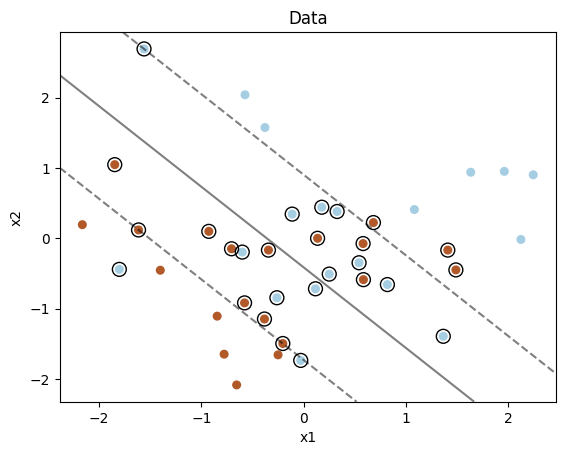

In [4]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

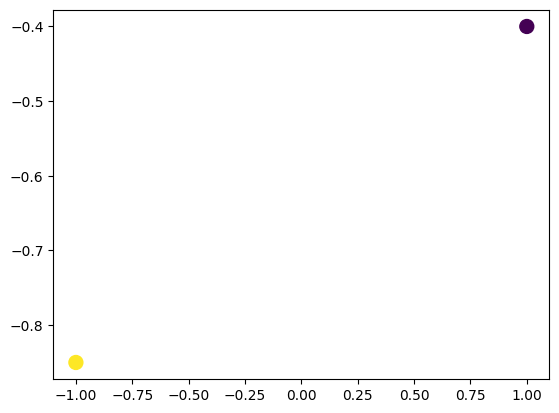

In [5]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [6]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62900794 0.37099206]
 [0.26314362 0.73685638]]


## Iris classification

In [7]:
from sklearn.datasets import load_iris
# load the iris dataset
iris = load_iris()

# create a DataFrame
iris_df = pd.DataFrame(
    data=np.hstack((iris.data, iris.target.reshape(-1, 1))), 
    columns=iris.feature_names + ['target'] 
)

# display data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
print(f'Data amount: {iris_df.shape[0]}.')

Data amount: 150.


In [9]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)
print(f'Train data amount: {X_train.shape[0]}.')
print(f'Test data amount: {X_test.shape[0]}.')

Train data amount: 120.
Test data amount: 30.


In [10]:
# labels
labels = np.unique(iris.target)
print(f'Labels: {labels}.')

Labels: [0 1 2].


In [11]:
def classify(X_train, X_test, labels):
  # create a classifier for each label
  classifiers = []
  for label in labels:
    clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
    # fit the classifier to the training data
    clf.fit(X_train, y_train == label)
    # append the classifier to the list
    classifiers.append(clf)

  # create an array to hold the probabilities
  probs = np.zeros((X_test.shape[0], len(classifiers)))
  # loop through each classifier
  for i, clf in enumerate(classifiers):
    # get the probabilities for each class
    # it has two columns, first - probability that it is not the class, second - probability that it is the class, so we take the second column
    predicts = clf.predict_proba(X_test)[:, 1]
    # store the probabilities in the array
    probs[:, i] = predicts
  
  result = np.zeros(X_test.shape[0])
  # loop through each sample
  for i in range(X_test.shape[0]):
    # get the index of the class with the highest probability
    index = np.argmax(probs[i])
    # store the class label in the result array
    result[i] = labels[index]
  return result

In [12]:
predictions = classify(X_train, X_test, labels)

In [13]:
def measure_accuracy(predictions, y_test):
  # calculate the accuracy
  accuracy = np.sum(predictions == y_test) / len(y_test)
  return accuracy

In [14]:
acc = measure_accuracy(predictions, y_test)
print(f'Accuracy: {acc:.2f}.')

Accuracy: 0.97.
